<font color="red" size=5>**California Housing Prediction**</font>

Importing the required libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
df = pd.read_csv("/content/cal_housing.csv")
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


**Attribute Information**:

        - longitude          block group longitude
        - latitude           block group latitude
        - housingMedianAge   median house age in block group
        - totalRooms         average number of rooms per household
        - totalBedrooms      average number of bedrooms per household
        - population         block group population
        - households         average number of household members
        - medianIncome       median income in block group
        - medianHouseValue   median house value


The **target** variable is the **medianHouseValue** for California districts,
expressed in dollars ($1).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.


In [ ]:
df.isna().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualizing the 20,000 dataset and interpreting is practically impossible, so we will randomly select a 100 samples of data using **random** library. so creating a new sampled dataframe with random 100 rows from the **df** dataframe.

In [ ]:
random_indices = random.sample(range(len(df)),100)
sample_df = df.iloc[random_indices]
sample_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
11918,-117.41,33.95,37.0,1462.0,257.0,849.0,287.0,3.0542,123900.0
11170,-117.98,33.82,34.0,1038.0,175.0,578.0,174.0,4.9219,200000.0
1572,-122.00,37.82,20.0,2206.0,458.0,926.0,432.0,4.6042,256400.0
3542,-118.57,34.27,20.0,7384.0,845.0,2795.0,872.0,9.6047,500001.0
587,-122.11,37.71,36.0,4569.0,824.0,1950.0,819.0,4.6500,206800.0


Using the **matplotlib** library to plot graphs and visuals.

Now, visualizing the datasets and relationship between each predictor and feature i.e. **medianHouseValue** graphically using plots and graphs

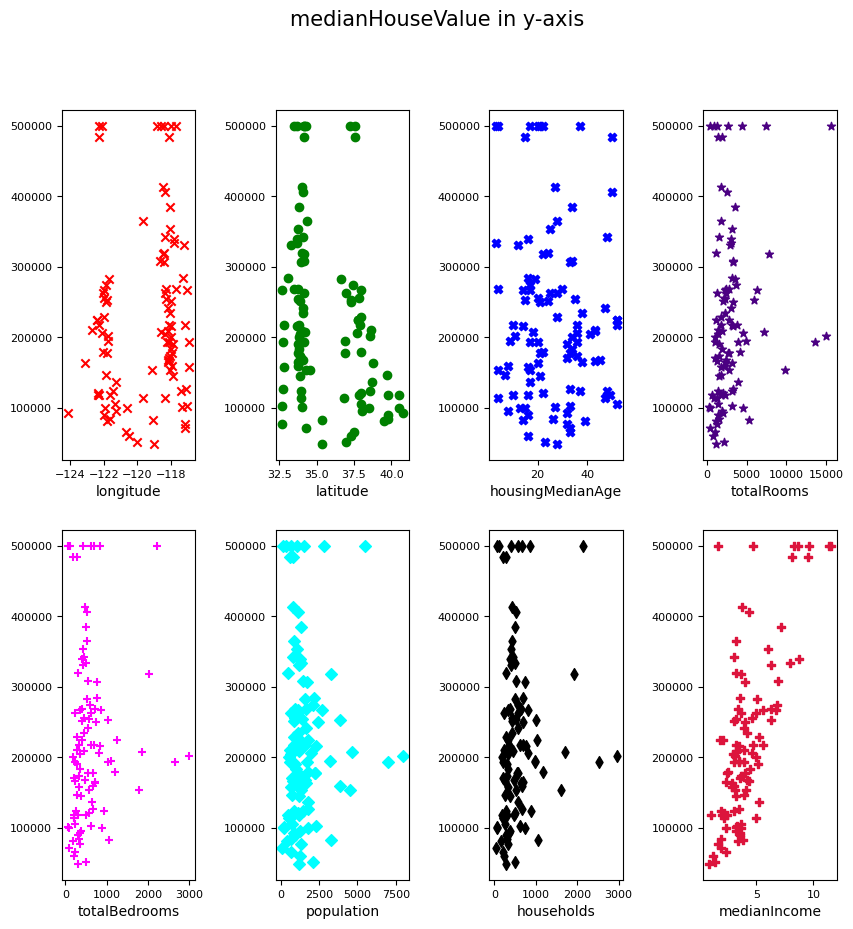

In [ ]:

columns = [column for column in sample_df.columns if not column=="medianHouseValue"]
vertical = sample_df["medianHouseValue"]
colors = ["red","green","blue","indigo","magenta","cyan","black","crimson"]
markers = ["x","o","X","*","+","D","d","P"]
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(10,10))
axes = axes.flatten()
for i,ax in enumerate(axes):
  ax.scatter(sample_df[columns[i]],vertical,marker=markers[i],color=colors[i])
  # ax.set_title(f"{columns[i]} vs median_house_value")
  ax.set_xlabel(f"{columns[i]}")
  ax.tick_params(axis="both",labelsize=8)


plt.subplots_adjust(hspace=0.2, wspace=0.6)
plt.suptitle("medianHouseValue in y-axis",fontsize=15)
plt.show()


As we can see that observing the visuals and scatter plots, it is difficult to interpret the relationship between the different variables(features and targets). So, we will use mathematical relations and concepts like correlation to understand the relationship between variables.

<font color="red">**.corr()**</font> method in dataframe provides the dataframe of calculated correlation between each columns.

In [ ]:
corr =df.corr()
corr.style.background_gradient()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


From the above dataframe, we can draw conclusions about the linear relationship between predictor and feature variable. We can clearly see that the correlation between feature i.e. **medianHouseValue** and predictors.

The correlation coefficient between **medianHouseValue** and predictors(**latitude,longitude,totalBedrooms,population,household**)are nearly equal to zero or negative. Hence, this predictors may not be good inferences of **medianHouseValue**.

**Question :- is there exist collinearity between independent variables ?**

**==>** Now, we will check for multicollinearity. High multicollinearity between predictor variables affect the performance of algorithms like linear regression.


Read more about [VARIANCE INFLATION FACTOR](https://www.investopedia.com/terms/v/variance-inflation-factor.asp)

**Null Hypothesis(H0)** :- There is no perfect multicollinearity among the independent variables.

**Alternative Hypothesis(H1)** :- There is perfect collinearity.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

predictors = df.drop('medianHouseValue', axis=1)

X = sm.add_constant(predictors)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

if (vif_data["VIF"]>10).any():
  print(f"The null hypothesis is rejected !!\n")

print(vif_data)

The null hypothesis is rejected !!

           Variable           VIF
0             const  16698.969920
1         longitude      8.712502
2          latitude      8.828897
3  housingMedianAge      1.260125
4        totalRooms     12.621775
5     totalBedrooms     36.088842
6        population      6.373624
7        households     35.240948
8      medianIncome      1.729943


so, we can clearly see that features **totalRooms**,**totalBedrooms** and **households** have very high multicollinearity amongs features which may affect the performance of model. so we will(may) consider and study these features closely.

**Question :- Does the target variable follow normal distribution ?**

**=>** we will check if the dependent variable follows a normal distribution, which is an assumption of many regression models.

**Null Hypothesis(H0)** :- The dependent variable is normally distributed.

**Alternative Hypothesis(H1)** :- The dependent variable is not normally distributed.


Now, we will visualize the target variable using **histograms** to see if it follows normal distribution or not.

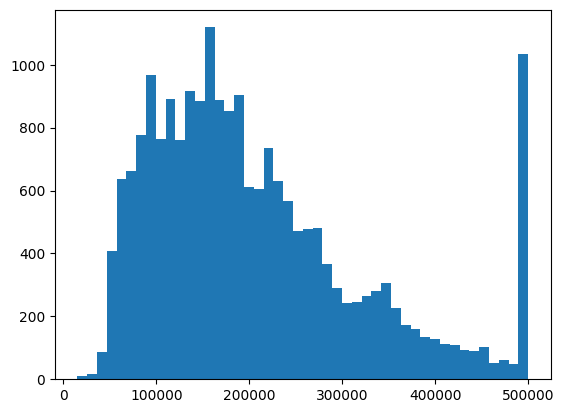

In [ ]:
plt.hist(df["medianHouseValue"],bins="auto");

In [ ]:
import scipy.stats as stats

stat, p_value = stats.shapiro(df["medianHouseValue"]);

alpha = 0.05
if p_value > alpha:
    print("Dependent variable is normally distributed (fail to reject the null hypothesis)")
else:
    print("Dependent variable is not normally distributed (reject the null hypothesis)")


Dependent variable is not normally distributed (reject the null hypothesis)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
